In [1]:
%%capture
import os
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.nn.functional import relu
from torch.utils.data import Dataset
from torchvision import models
from torchvision import datasets
from torchvision.io import read_image
from torchvision.transforms import ToTensor
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime
from tensorboardX import SummaryWriter

# Data Loading

In [ ]:
# root_dir = "../../data"
# files_list = os.listdir(os.path.join(root_dir, "OTU_2d", "images"))  #, "*.JPG")

In [ ]:
# class CustomImageDataset(Dataset):
#     def __init__(self, img_dir, transform=None, target_transform=None, test_mode=False):
#         self.img_dir = img_dir
#         self.mask_dir = img_dir.replace("images", "masks")
#         self.transform = transform
#         self.target_transform = target_transform
#         self.test_mode = test_mode
#         if self.test_mode:
#             self.imgs = self._get_imgs(img_dir)
#         else:
#             self.imgs, self.masks = self._get_imgs_and_masks(img_dir)

#             print(self.masks)

#     def _get_imgs_and_masks(self, img_dir):
#         imgs = []
#         masks = []
#         for filename in os.listdir(img_dir):
#             if filename.endswith(".JPG"): # and not filename.endswith(".PNG"):
#                 mask_filename = filename.replace("images", "masks").replace('.JPG', ".PNG")
#                 #if mask_filename in os.listdir(img_dir):
#                 imgs.append(filename)
#                 masks.append(mask_filename)
                    
#         # Debugging: Print out the number of images and masks found
#         print(f"Found {len(imgs)} images and {len(masks)} masks in {img_dir}. Train/validation mode is on")

#         return imgs, masks
    
#     def _get_imgs(self, img_dir):
#         imgs = []
#         for filename in os.listdir(img_dir):
#             if filename.endswith(".JPG"):
#                 imgs.append(filename)
        
#         print(f"Found {len(imgs)} images in {img_dir}. Test mode is on")

#         return imgs

#     def __len__(self):
#         return len(self.imgs)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.imgs[idx])
#         img = Image.open(img_path).convert('L')
#         if self.transform:
#             img = self.transform(img)
            
#         if self.test_mode:
#             return img
            
#         mask_path = os.path.join(self.mask_dir, self.masks[idx])
#         mask = Image.open(mask_path).convert('L')
#         #mask = mask.point(lambda p: 1 if p > 0 else 0)
#         if self.target_transform:
#             mask = self.target_transform(mask) #/np.max(mask)
#         return img, mask

In [ ]:
# import torchvision.transforms as transforms

# # Define transforms
# transform = transforms.Compose([
#     transforms.Pad(14, fill=0, padding_mode='constant'),
#     transforms.Resize((256, 256)),  # Corrected from Resized to Resize
#     transforms.ToTensor(),
# ])

# transform2 = transforms.Compose([
#     transforms.Pad(14, fill=0, padding_mode='constant'),
#     transforms.Resize((256, 256), interpolation=Image.NEAREST),  # Preserve binary values
#     transforms.ToTensor(),  # Convert to tensor
#     transforms.Lambda(lambda x: (x > 0).float())  # Ensure binary mask (0 or 1)
# ])


# # Create datasets
# train_dataset = CustomImageDataset(os.path.join(root_dir, "OTU_2d", "images"), transform=transform, target_transform=transform2)
# test_dataset = CustomImageDataset(os.path.join(root_dir, "OTU_2d", "images"), transform=transform, target_transform=transform2, test_mode=True)

Found 1469 images and 1469 masks in ../../data\OTU_2d\images. Train/validation mode is on
['1.PNG', '10.PNG', '100.PNG', '1000.PNG', '1001.PNG', '1002.PNG', '1003.PNG', '1004.PNG', '1005.PNG', '1006.PNG', '1007.PNG', '1008.PNG', '1009.PNG', '101.PNG', '1010.PNG', '1011.PNG', '1012.PNG', '1013.PNG', '1014.PNG', '1015.PNG', '1016.PNG', '1017.PNG', '1018.PNG', '1019.PNG', '102.PNG', '1020.PNG', '1021.PNG', '1022.PNG', '1023.PNG', '1024.PNG', '1025.PNG', '1026.PNG', '1027.PNG', '1028.PNG', '1029.PNG', '103.PNG', '1030.PNG', '1031.PNG', '1032.PNG', '1033.PNG', '1034.PNG', '1035.PNG', '1036.PNG', '1037.PNG', '1038.PNG', '1039.PNG', '104.PNG', '1040.PNG', '1041.PNG', '1042.PNG', '1043.PNG', '1044.PNG', '1045.PNG', '1046.PNG', '1047.PNG', '1048.PNG', '1049.PNG', '105.PNG', '1050.PNG', '1051.PNG', '1052.PNG', '1053.PNG', '1054.PNG', '1055.PNG', '1056.PNG', '1057.PNG', '1058.PNG', '1059.PNG', '106.PNG', '1060.PNG', '1061.PNG', '1062.PNG', '1063.PNG', '1064.PNG', '1065.PNG', '1066.PNG', '1067.PNG

In [16]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.PadIfNeeded(min_height=256, min_width=256, border_mode=0, value=0, mask_value=0),
    A.RandomCrop(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ElasticTransform(p=0.2),
    A.GridDistortion(p=0.2),
    A.Normalize(mean=(0.5,), std=(0.5,)),  # Adjust if using RGB
    ToTensorV2()
])

val_transform = A.Compose([
    A.PadIfNeeded(min_height=256, min_width=256, border_mode=0, value=0, mask_value=0),
    A.CenterCrop(256, 256),
    A.Normalize(mean=(0.5,), std=(0.5,)),
    ToTensorV2()
])


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
C:\Users\mdiqb\AppData\Local\Temp\ipykernel_15760\103988421.py:5: UserWarning: Argument(s) 'value, mask_value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=256, min_width=256, border_mode=0, value=0, mask_value=0),
C:\Users\mdiqb\AppData\Local\Temp\ipykernel_15760\103988421.py:17: UserWarning: Argument(s) 'value, mask_value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=256, min_width=256, border_mode=0, value=0, mask_value=0),


In [17]:
from PIL import Image
import os
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, test_mode=False):
        self.img_dir = img_dir
        self.mask_dir = img_dir.replace("images", "masks")
        self.transform = transform
        self.test_mode = test_mode

        self.imgs = [f for f in os.listdir(img_dir) if f.endswith(".JPG")]
        self.imgs.sort()

        if not test_mode:
            self.masks = [f.replace('.JPG', '.PNG') for f in self.imgs]
            self.masks.sort()

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.imgs[idx])
        img = np.array(Image.open(img_path).convert('L'))  # Grayscale

        if self.test_mode:
            if self.transform:
                transformed = self.transform(image=img)
                return transformed["image"]
            return torch.tensor(img).unsqueeze(0).float() / 255.

        mask_path = os.path.join(self.mask_dir, self.masks[idx])
        mask = np.array(Image.open(mask_path).convert('L'))
        mask = (mask > 0).astype('float32')  # Ensure binary

        if self.transform:
            transformed = self.transform(image=img, mask=mask)
            return transformed["image"], transformed["mask"]

        return torch.tensor(img).unsqueeze(0).float(), torch.tensor(mask).unsqueeze(0).float()


In [18]:
train_dataset = CustomImageDataset(
    img_dir=os.path.join(root_dir, "OTU_2d", "images"),
    transform=train_transform,
    test_mode=False
)

test_dataset = CustomImageDataset(
    img_dir=os.path.join(root_dir, "OTU_2d", "images"),
    transform=val_transform,
    test_mode=True
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2)


In [19]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# Assuming train_dataset is your instance of CustomImageDataset
total_train_samples = len(train_dataset)
train_size = int(0.8 * total_train_samples)  # 80% for training
validation_size = total_train_samples - train_size  # 20% for validation

train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])

# Now create DataLoaders for each set
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=8, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

Feature batch shape: torch.Size([8, 1, 256, 256])
Masks batch shape: torch.Size([8, 256, 256])


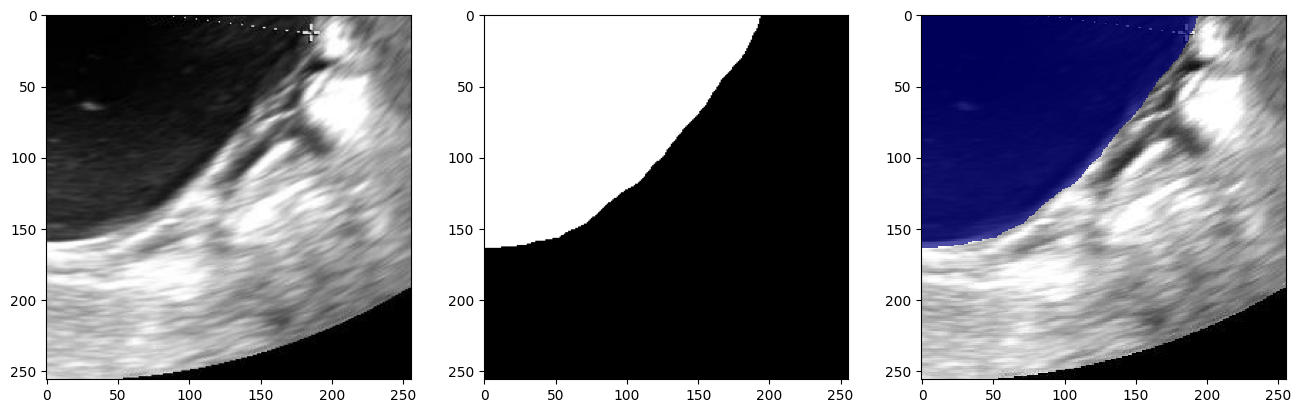

In [35]:
train_features, train_masks = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Masks batch shape: {train_masks.size()}")

img = train_features[0].squeeze()
mask = train_masks[0].squeeze()
img_mask = np.ma.masked_where(mask == 0, mask)

fig, ax = plt.subplots(1,3,figsize = (16,12))

ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(mask, cmap = 'gray')
ax[2].imshow(img, cmap = 'gray', interpolation = 'none')
ax[2].imshow(img_mask, cmap = 'jet', interpolation = 'none', alpha = 0.7)

# EDA

In [36]:
#takes long

def analyze_masks(dataloader):
    mask_presence = []

    for _, masks in dataloader:
        for mask in masks:
            # Assuming binary mask [0, 1]
            object_present = np.any(mask.numpy() > 0)
            mask_presence.append(object_present)

    return mask_presence

mask_presence_train = analyze_masks(train_dataloader)
mask_presence_validation = analyze_masks(validation_dataloader)

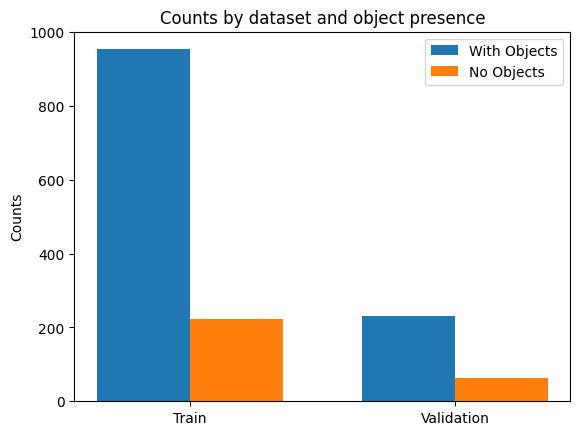

In [37]:
def plot_mask_presence(mask_presence_train, mask_presence_validation):
    train_objects = sum(mask_presence_train)
    train_no_objects = len(mask_presence_train) - train_objects
    validation_objects = sum(mask_presence_validation)
    validation_no_objects = len(mask_presence_validation) - validation_objects

    labels = ['Train', 'Validation']
    objects_counts = [train_objects, validation_objects]
    no_objects_counts = [train_no_objects, validation_no_objects]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, objects_counts, width, label='With Objects')
    rects2 = ax.bar(x + width/2, no_objects_counts, width, label='No Objects')

    ax.set_ylabel('Counts')
    ax.set_title('Counts by dataset and object presence')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

plot_mask_presence(mask_presence_train, mask_presence_validation)

# Data Preprocessing

# Modeling

In [9]:
# %%capture
# !pip install -U segmentation-models-pytorch
# !pip install tqdm

In [38]:
import segmentation_models_pytorch as smp
from tqdm import tqdm

In [39]:
model = smp.DeepLabV3Plus(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=2,                      # model output channels (number of classes in your dataset)
)

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move your model to the GPU
model.to(device);

Using device: cuda


In [41]:
#loss = torch.nn.CrossEntropyLoss()

# Assuming class 0 is the background and class 1 is the object
# Adjust weights as necessary based on your dataset
#weights = torch.tensor([0.1, 0.9]).to(device) 
#loss = nn.CrossEntropyLoss(weight=weights)

class DiceLoss(nn.Module):
    def forward(self, inputs, targets, smooth=1):
        # Apply sigmoid to the model's output
        inputs = torch.sigmoid(inputs)

        # Select the relevant class (e.g., class '1' for object)
        # Assuming the model outputs two classes (background and object)
        inputs = inputs[:, 1, :, :]  # Shape: [batch_size, height, width]

        # Flatten label and prediction tensors
        inputs = inputs.contiguous().view(-1)
        targets = targets.contiguous().view(-1)

        intersection = (inputs * targets).sum()
        dice_score = (2. * intersection + smooth) / (inputs.sum() + targets.sum() + smooth)

        return 1 - dice_score
"""
dice_loss = DiceLoss()

class CombinedLoss(nn.Module):
    def __init__(self, weight_ce, weight_dice):
        super(CombinedLoss, self).__init__()
        self.ce_loss = nn.CrossEntropyLoss(weight=weight_ce)
        self.dice_loss = DiceLoss()
        self.weight_dice = weight_dice

    def forward(self, inputs, targets):
        return self.ce_loss(inputs, targets) + self.weight_dice * self.dice_loss(inputs, targets)

# Adjust these weights as necessary
weight_ce = torch.tensor([0.1, 0.9]).to(device)
weight_dice = 0.5  # Example weight, adjust as needed

combined_loss = CombinedLoss(weight_ce, weight_dice)
"""
combined_loss = DiceLoss()

In [42]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [43]:
loss_function = combined_loss

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('../../runs/trainer_{}'.format(timestamp))
epoch_number = 0
EPOCHS = 50
best_vloss = 1_000_000.

# Define the training function
# Define the training function
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.0

    # Iterate over the training dataset
    for i, data in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch_index + 1}")):
        inputs, labels = data
        inputs = inputs.float().to(device)
        labels = labels.squeeze(1).long().to(device)  # Ensure labels are properly formatted

        optimizer.zero_grad()
        outputs = model(inputs)
        loss_value = combined_loss(outputs, labels)
        loss_value.backward()
        optimizer.step()

        running_loss += loss_value.item()
        if i % 100 == 99:
            last_loss = running_loss / 100  # Average loss per batch
            print('  Batch {} Loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_dataloader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.0

    return last_loss

In [44]:
# Main training and validation loop
for epoch in range(EPOCHS):
    
    print('EPOCH {}:'.format(epoch_number + 1))

    model.train()
    avg_loss = train_one_epoch(epoch_number, writer)

    running_vloss = 0.0
    model.eval()
    with torch.no_grad():
        for i, vdata in enumerate(validation_dataloader):
            vinputs, vlabels = vdata
            vinputs = vinputs.float().to(device)  # Shape: [batch_size, channels, height, width]
            vlabels = vlabels.squeeze(1).long().to(device)

            voutputs = model(vinputs)
            vloss = loss_function(voutputs, vlabels)  # Use the combined loss function
            running_vloss += vloss.item()

    avg_vloss = running_vloss / len(validation_dataloader)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    writer.add_scalars('Training vs. Validation Loss',
                       {'Training': avg_loss, 'Validation': avg_vloss},
                       epoch_number + 1)
    writer.flush()

    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = '../../checkpoints/deeplabv3/model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:


Epoch 1:  69%|██████▊   | 101/147 [00:08<00:03, 13.72it/s]

  Batch 100 Loss: 0.6181161278486251


Epoch 1: 100%|██████████| 147/147 [00:11<00:00, 12.77it/s]


LOSS train 0.6181161278486251 valid 0.5729987540760556
EPOCH 2:


Epoch 2:  69%|██████▉   | 102/147 [00:07<00:03, 12.89it/s]

  Batch 100 Loss: 0.5318006473779678


Epoch 2: 100%|██████████| 147/147 [00:11<00:00, 13.06it/s]


LOSS train 0.5318006473779678 valid 0.45600163453334086
EPOCH 3:


Epoch 3:  69%|██████▉   | 102/147 [00:07<00:03, 13.78it/s]

  Batch 100 Loss: 0.40905077576637267


Epoch 3: 100%|██████████| 147/147 [00:11<00:00, 13.18it/s]


LOSS train 0.40905077576637267 valid 0.3455917964110503
EPOCH 4:


Epoch 4:  69%|██████▊   | 101/147 [00:07<00:03, 13.91it/s]

  Batch 100 Loss: 0.33802330076694487


Epoch 4: 100%|██████████| 147/147 [00:10<00:00, 13.39it/s]


LOSS train 0.33802330076694487 valid 0.2736500372757783
EPOCH 5:


Epoch 5:  69%|██████▉   | 102/147 [00:07<00:03, 13.30it/s]

  Batch 100 Loss: 0.30193800806999205


Epoch 5: 100%|██████████| 147/147 [00:11<00:00, 13.11it/s]


LOSS train 0.30193800806999205 valid 0.26359205310409134
EPOCH 6:


Epoch 6:  69%|██████▉   | 102/147 [00:07<00:03, 13.30it/s]

  Batch 100 Loss: 0.28847079634666445


Epoch 6: 100%|██████████| 147/147 [00:10<00:00, 13.50it/s]


LOSS train 0.28847079634666445 valid 0.23599388470520843
EPOCH 7:


Epoch 7:  69%|██████▊   | 101/147 [00:07<00:03, 13.83it/s]

  Batch 100 Loss: 0.26610105216503144


Epoch 7: 100%|██████████| 147/147 [00:10<00:00, 13.39it/s]


LOSS train 0.26610105216503144 valid 0.22353159736942602
EPOCH 8:


Epoch 8:  69%|██████▊   | 101/147 [00:07<00:03, 13.95it/s]

  Batch 100 Loss: 0.25401809871196745


Epoch 8: 100%|██████████| 147/147 [00:10<00:00, 13.41it/s]


LOSS train 0.25401809871196745 valid 0.2260492589022662
EPOCH 9:


Epoch 9:  69%|██████▉   | 102/147 [00:07<00:03, 13.94it/s]

  Batch 100 Loss: 0.23907420694828033


Epoch 9: 100%|██████████| 147/147 [00:10<00:00, 13.57it/s]


LOSS train 0.23907420694828033 valid 0.23693237272468773
EPOCH 10:


Epoch 10:  69%|██████▊   | 101/147 [00:07<00:03, 13.96it/s]

  Batch 100 Loss: 0.2641787087917328


Epoch 10: 100%|██████████| 147/147 [00:10<00:00, 13.71it/s]


LOSS train 0.2641787087917328 valid 0.23099088185542338
EPOCH 11:


Epoch 11:  69%|██████▉   | 102/147 [00:07<00:03, 13.63it/s]

  Batch 100 Loss: 0.23974042296409606


Epoch 11: 100%|██████████| 147/147 [00:10<00:00, 13.63it/s]


LOSS train 0.23974042296409606 valid 0.2136686379845078
EPOCH 12:


Epoch 12:  69%|██████▊   | 101/147 [00:07<00:03, 14.03it/s]

  Batch 100 Loss: 0.24782801449298858


Epoch 12: 100%|██████████| 147/147 [00:11<00:00, 13.08it/s]


LOSS train 0.24782801449298858 valid 0.2054155227300283
EPOCH 13:


Epoch 13:  69%|██████▊   | 101/147 [00:07<00:03, 13.46it/s]

  Batch 100 Loss: 0.23701413333415985


Epoch 13: 100%|██████████| 147/147 [00:11<00:00, 12.94it/s]


LOSS train 0.23701413333415985 valid 0.20763065202816114
EPOCH 14:


Epoch 14:  69%|██████▉   | 102/147 [00:07<00:03, 13.49it/s]

  Batch 100 Loss: 0.24709553360939027


Epoch 14: 100%|██████████| 147/147 [00:11<00:00, 13.27it/s]


LOSS train 0.24709553360939027 valid 0.23243501218589577
EPOCH 15:


Epoch 15:  69%|██████▉   | 102/147 [00:07<00:03, 13.67it/s]

  Batch 100 Loss: 0.23686971306800841


Epoch 15: 100%|██████████| 147/147 [00:11<00:00, 13.30it/s]


LOSS train 0.23686971306800841 valid 0.2064967687065537
EPOCH 16:


Epoch 16:  69%|██████▉   | 102/147 [00:07<00:03, 13.68it/s]

  Batch 100 Loss: 0.22614118933677674


Epoch 16: 100%|██████████| 147/147 [00:11<00:00, 13.35it/s]


LOSS train 0.22614118933677674 valid 0.2186509692991102
EPOCH 17:


Epoch 17:  69%|██████▉   | 102/147 [00:07<00:03, 13.69it/s]

  Batch 100 Loss: 0.21500590264797212


Epoch 17: 100%|██████████| 147/147 [00:11<00:00, 13.27it/s]


LOSS train 0.21500590264797212 valid 0.17736086490991954
EPOCH 18:


Epoch 18:  69%|██████▊   | 101/147 [00:07<00:03, 13.00it/s]

  Batch 100 Loss: 0.21532535672187805


Epoch 18: 100%|██████████| 147/147 [00:11<00:00, 13.13it/s]


LOSS train 0.21532535672187805 valid 0.2027508552009995
EPOCH 19:


Epoch 19:  69%|██████▉   | 102/147 [00:07<00:03, 13.42it/s]

  Batch 100 Loss: 0.2191317218542099


Epoch 19: 100%|██████████| 147/147 [00:11<00:00, 13.14it/s]


LOSS train 0.2191317218542099 valid 0.17527201207908424
EPOCH 20:


Epoch 20:  69%|██████▊   | 101/147 [00:07<00:03, 13.41it/s]

  Batch 100 Loss: 0.2046032977104187


Epoch 20: 100%|██████████| 147/147 [00:11<00:00, 13.07it/s]


LOSS train 0.2046032977104187 valid 0.16484477713301376
EPOCH 21:


Epoch 21:  69%|██████▉   | 102/147 [00:08<00:03, 13.47it/s]

  Batch 100 Loss: 0.19583573043346406


Epoch 21: 100%|██████████| 147/147 [00:11<00:00, 12.85it/s]


LOSS train 0.19583573043346406 valid 0.1877844059789503
EPOCH 22:


Epoch 22:  69%|██████▉   | 102/147 [00:07<00:03, 13.07it/s]

  Batch 100 Loss: 0.21681108236312865


Epoch 22: 100%|██████████| 147/147 [00:11<00:00, 13.12it/s]


LOSS train 0.21681108236312865 valid 0.18220977364359675
EPOCH 23:


Epoch 23:  69%|██████▊   | 101/147 [00:07<00:03, 13.78it/s]

  Batch 100 Loss: 0.19023580968379974


Epoch 23: 100%|██████████| 147/147 [00:11<00:00, 13.19it/s]


LOSS train 0.19023580968379974 valid 0.17566774503604785
EPOCH 24:


Epoch 24:  69%|██████▉   | 102/147 [00:07<00:03, 13.92it/s]

  Batch 100 Loss: 0.19811675012111662


Epoch 24: 100%|██████████| 147/147 [00:10<00:00, 13.47it/s]


LOSS train 0.19811675012111662 valid 0.17004724451013514
EPOCH 25:


Epoch 25:  69%|██████▉   | 102/147 [00:07<00:03, 13.53it/s]

  Batch 100 Loss: 0.17991807520389558


Epoch 25: 100%|██████████| 147/147 [00:10<00:00, 13.55it/s]


LOSS train 0.17991807520389558 valid 0.19342671697204178
EPOCH 26:


Epoch 26:  69%|██████▉   | 102/147 [00:07<00:03, 13.71it/s]

  Batch 100 Loss: 0.2074149250984192


Epoch 26: 100%|██████████| 147/147 [00:10<00:00, 13.44it/s]


LOSS train 0.2074149250984192 valid 0.17458939874494397
EPOCH 27:


Epoch 27:  69%|██████▊   | 101/147 [00:07<00:03, 13.92it/s]

  Batch 100 Loss: 0.1975410670042038


Epoch 27: 100%|██████████| 147/147 [00:11<00:00, 13.33it/s]


LOSS train 0.1975410670042038 valid 0.18013644540632093
EPOCH 28:


Epoch 28:  69%|██████▉   | 102/147 [00:07<00:03, 13.25it/s]

  Batch 100 Loss: 0.193115553855896


Epoch 28: 100%|██████████| 147/147 [00:11<00:00, 13.12it/s]


LOSS train 0.193115553855896 valid 0.1895564923415313
EPOCH 29:


Epoch 29:  69%|██████▉   | 102/147 [00:07<00:03, 14.15it/s]

  Batch 100 Loss: 0.21049736082553863


Epoch 29: 100%|██████████| 147/147 [00:11<00:00, 13.21it/s]


LOSS train 0.21049736082553863 valid 0.17233831979132988
EPOCH 30:


Epoch 30:  69%|██████▉   | 102/147 [00:07<00:03, 13.20it/s]

  Batch 100 Loss: 0.18924989879131318


Epoch 30: 100%|██████████| 147/147 [00:11<00:00, 13.10it/s]


LOSS train 0.18924989879131318 valid 0.17032872986149145
EPOCH 31:


Epoch 31:  69%|██████▉   | 102/147 [00:07<00:03, 13.03it/s]

  Batch 100 Loss: 0.20065629422664644


Epoch 31: 100%|██████████| 147/147 [00:11<00:00, 13.16it/s]


LOSS train 0.20065629422664644 valid 0.17571099867691864
EPOCH 32:


Epoch 32:  69%|██████▉   | 102/147 [00:07<00:03, 12.94it/s]

  Batch 100 Loss: 0.17591785967350007


Epoch 32: 100%|██████████| 147/147 [00:11<00:00, 13.05it/s]


LOSS train 0.17591785967350007 valid 0.17414135063016736
EPOCH 33:


Epoch 33:  69%|██████▉   | 102/147 [00:07<00:03, 14.34it/s]

  Batch 100 Loss: 0.18798246443271638


Epoch 33: 100%|██████████| 147/147 [00:10<00:00, 13.56it/s]


LOSS train 0.18798246443271638 valid 0.1614678904816911
EPOCH 34:


Epoch 34:  69%|██████▉   | 102/147 [00:07<00:03, 14.20it/s]

  Batch 100 Loss: 0.17965552270412444


Epoch 34: 100%|██████████| 147/147 [00:11<00:00, 13.03it/s]


LOSS train 0.17965552270412444 valid 0.179683814177642
EPOCH 35:


Epoch 35:  69%|██████▉   | 102/147 [00:07<00:03, 13.49it/s]

  Batch 100 Loss: 0.176120263338089


Epoch 35: 100%|██████████| 147/147 [00:11<00:00, 13.12it/s]


LOSS train 0.176120263338089 valid 0.1570374949558361
EPOCH 36:


Epoch 36:  69%|██████▉   | 102/147 [00:07<00:03, 12.50it/s]

  Batch 100 Loss: 0.18442571818828582


Epoch 36: 100%|██████████| 147/147 [00:11<00:00, 13.05it/s]


LOSS train 0.18442571818828582 valid 0.16923114415761586
EPOCH 37:


Epoch 37:  69%|██████▉   | 102/147 [00:07<00:03, 13.58it/s]

  Batch 100 Loss: 0.18122536182403565


Epoch 37: 100%|██████████| 147/147 [00:11<00:00, 13.06it/s]


LOSS train 0.18122536182403565 valid 0.1853400613810565
EPOCH 38:


Epoch 38:  69%|██████▉   | 102/147 [00:07<00:03, 13.09it/s]

  Batch 100 Loss: 0.16710078597068787


Epoch 38: 100%|██████████| 147/147 [00:11<00:00, 13.15it/s]


LOSS train 0.16710078597068787 valid 0.17175433603492943
EPOCH 39:


Epoch 39:  69%|██████▊   | 101/147 [00:07<00:03, 13.04it/s]

  Batch 100 Loss: 0.17245344400405885


Epoch 39: 100%|██████████| 147/147 [00:11<00:00, 13.10it/s]


LOSS train 0.17245344400405885 valid 0.18270640598761068
EPOCH 40:


Epoch 40:  69%|██████▉   | 102/147 [00:07<00:03, 13.43it/s]

  Batch 100 Loss: 0.1709110903739929


Epoch 40: 100%|██████████| 147/147 [00:10<00:00, 13.37it/s]


LOSS train 0.1709110903739929 valid 0.1572176797969921
EPOCH 41:


Epoch 41:  69%|██████▉   | 102/147 [00:07<00:03, 13.41it/s]

  Batch 100 Loss: 0.1795291656255722


Epoch 41: 100%|██████████| 147/147 [00:11<00:00, 13.35it/s]


LOSS train 0.1795291656255722 valid 0.1669363427806545
EPOCH 42:


Epoch 42:  69%|██████▉   | 102/147 [00:07<00:03, 12.97it/s]

  Batch 100 Loss: 0.1811816656589508


Epoch 42: 100%|██████████| 147/147 [00:11<00:00, 13.22it/s]


LOSS train 0.1811816656589508 valid 0.17190870078834328
EPOCH 43:


Epoch 43:  69%|██████▉   | 102/147 [00:07<00:03, 13.51it/s]

  Batch 100 Loss: 0.1786004239320755


Epoch 43: 100%|██████████| 147/147 [00:11<00:00, 13.15it/s]


LOSS train 0.1786004239320755 valid 0.17731229034630028
EPOCH 44:


Epoch 44:  69%|██████▉   | 102/147 [00:07<00:03, 13.69it/s]

  Batch 100 Loss: 0.17563996493816375


Epoch 44: 100%|██████████| 147/147 [00:10<00:00, 13.54it/s]


LOSS train 0.17563996493816375 valid 0.15780150568163073
EPOCH 45:


Epoch 45:  69%|██████▉   | 102/147 [00:07<00:03, 13.25it/s]

  Batch 100 Loss: 0.18810702800750734


Epoch 45: 100%|██████████| 147/147 [00:10<00:00, 13.53it/s]


LOSS train 0.18810702800750734 valid 0.15500116187172966
EPOCH 46:


Epoch 46:  69%|██████▊   | 101/147 [00:07<00:03, 13.25it/s]

  Batch 100 Loss: 0.17222364723682404


Epoch 46: 100%|██████████| 147/147 [00:11<00:00, 13.21it/s]


LOSS train 0.17222364723682404 valid 0.15779590284502185
EPOCH 47:


Epoch 47:  69%|██████▉   | 102/147 [00:07<00:03, 13.90it/s]

  Batch 100 Loss: 0.1745546442270279


Epoch 47: 100%|██████████| 147/147 [00:10<00:00, 13.49it/s]


LOSS train 0.1745546442270279 valid 0.16292917567330437
EPOCH 48:


Epoch 48:  69%|██████▉   | 102/147 [00:07<00:03, 13.60it/s]

  Batch 100 Loss: 0.1736125671863556


Epoch 48: 100%|██████████| 147/147 [00:10<00:00, 13.55it/s]


LOSS train 0.1736125671863556 valid 0.15535786023011078
EPOCH 49:


Epoch 49:  69%|██████▉   | 102/147 [00:07<00:03, 13.47it/s]

  Batch 100 Loss: 0.17516449213027954


Epoch 49: 100%|██████████| 147/147 [00:10<00:00, 13.44it/s]


LOSS train 0.17516449213027954 valid 0.20171988010406494
EPOCH 50:


Epoch 50:  69%|██████▉   | 102/147 [00:07<00:03, 13.14it/s]

  Batch 100 Loss: 0.18096947073936462


Epoch 50: 100%|██████████| 147/147 [00:11<00:00, 13.17it/s]


LOSS train 0.18096947073936462 valid 0.15239496811016187


# Results

## Tensorboard

In [45]:
#model_path = '../../checkpoints/deeplabv3/model_{}_{}'.format(timestamp, epoch_number)
model_path = "../../checkpoints/deeplabv3/model_20250522_125038_49"
print("Best model saved to: ", model_path)

Best model saved to:  ../../checkpoints/deeplabv3/model_20250522_125038_49


In [46]:
model.load_state_dict(torch.load(model_path))  
model.to(device)
model.eval()

DeepLabV3Plus(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tr

## Visualizing results

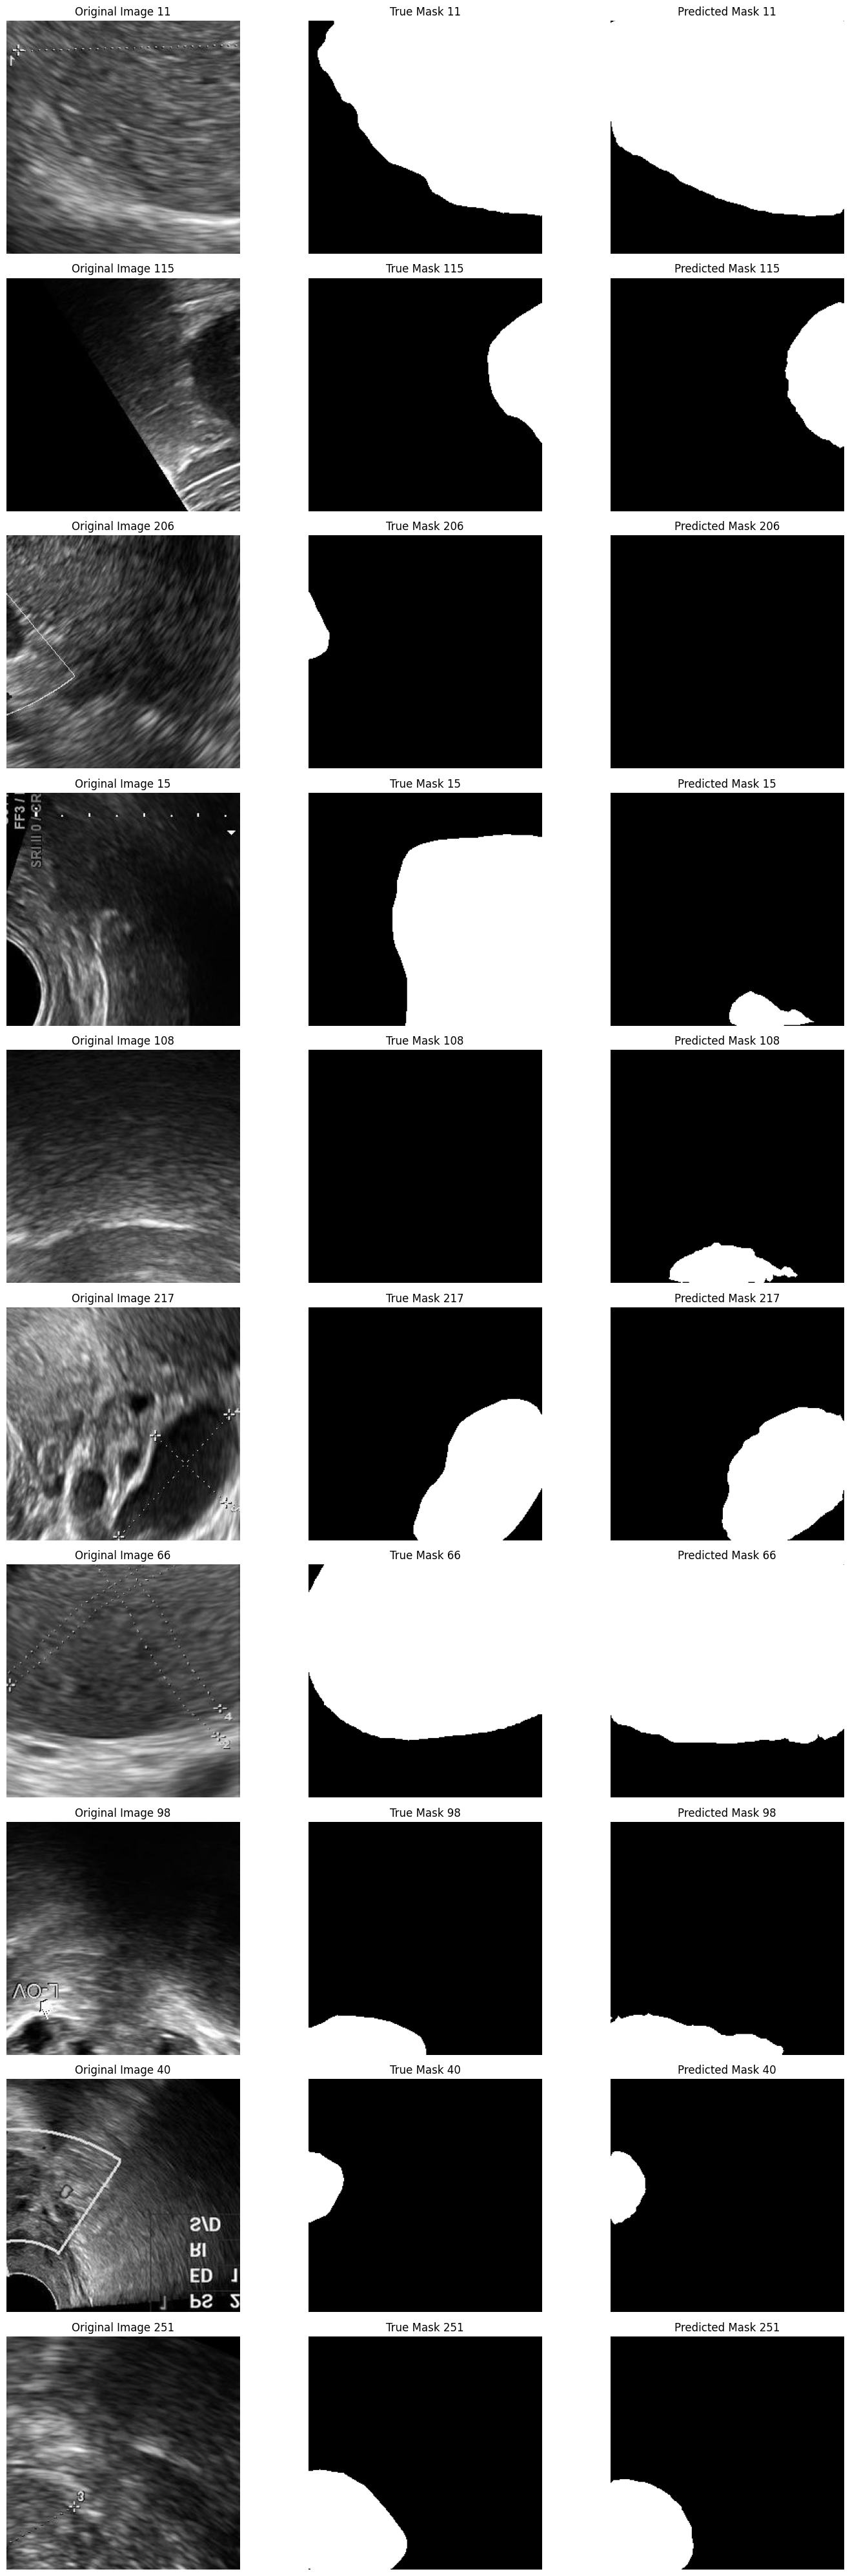

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Set the model to evaluation mode
model.eval()

# Randomly select 10 images from the validation dataset
indices = torch.randperm(len(validation_dataset))[:10]

# Create a figure for plotting
fig, axs = plt.subplots(10, 3, figsize=(15, 40))  # 10 rows, 3 columns

with torch.no_grad():
    for i, idx in enumerate(indices):
        # Get the ith sample
        image, true_mask = validation_dataset[idx]

        # Add batch dimension and transfer to the same device as model
        image_batch = image.unsqueeze(0).to(device)

        # Get model prediction
        prediction = model(image_batch)
        predicted_mask = torch.argmax(prediction, dim=1).squeeze(0).cpu()

        # Convert tensors to numpy arrays for plotting
        image_np = image.squeeze().cpu().numpy()
        true_mask_np = true_mask.squeeze().cpu().numpy()
        predicted_mask_np = predicted_mask.numpy()

        # Plot original image
        axs[i, 0].imshow(image_np, cmap='gray')
        axs[i, 0].axis('off')
        axs[i, 0].set_title(f'Original Image {idx}')

        # Plot true mask
        axs[i, 1].imshow(true_mask_np, cmap='gray')
        axs[i, 1].axis('off')
        axs[i, 1].set_title(f'True Mask {idx}')

        # Plot predicted mask
        axs[i, 2].imshow(predicted_mask_np, cmap='gray')
        axs[i, 2].axis('off')
        axs[i, 2].set_title(f'Predicted Mask {idx}')

plt.tight_layout()
plt.show()